In [2]:
import tushare as ts
token = '6feca07b866ea55bd6024aa5a8891d7bc11afd829d1386c8a2fc8d89'
# initial
pro = ts.pro_api(token)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import pandas as pd
import numpy as np
from scipy import stats
import time

In [3]:
hs300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000300cons.xls'
energy300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000908cons.xls'
material300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000909cons.xls'
industiral300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000910cons.xls'
sconsume300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000911cons.xls'
nconsume300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000912cons.xls'
medical300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000913cons.xls'
finance300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000914cons.xls'
it300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000915cons.xls'
telecom300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000916cons.xls'
utility300 = 'http://www.csindex.com.cn/uploads/file/autofile/cons/000917cons.xls'

In [4]:
index_code = '399300.SZ'
# index daily price and trade date
time_spread = 10 # Years
t = datetime.date.today()
end_date = t
start_date = datetime.datetime(t.year - time_spread, t.month, t.day)
end_date_str = end_date.strftime("%Y%m%d")
start_date_str = start_date.strftime("%Y%m%d")
p_t = ['trade_date'] #, 'open', 'high', 'low', 'close']
price = pro.index_daily(ts_code=index_code, start_date=start_date_str, end_date=end_date_str)
p = price[p_t]

In [44]:
# get cons from CSI
import requests
dls = hs300
resp = requests.get(dls)
with open('cons.xls', 'wb') as output:
    output.write(resp.content)
df = pd.read_excel('cons.xls')

In [45]:
# index compose
cs = []
cons_col = '成分券代码Constituent Code'
ex_col = '交易所Exchange'
for n in df[cons_col].values:
    e=df[df[cons_col]==n][ex_col].values
    if (e=='SHZ'):
        cs.append('{0:0{width}}'.format(n, width=6)+'.SZ')
    else:
        cs.append('{0:0{width}}'.format(n, width=6)+'.SH')
#for c in cs:
#    print(c)

In [46]:
# get basic data
r_t = 'ts_code,trade_date,pe,pb,circ_mv,total_mv'
mv = 'total_mv'
r = 'pe'
p_mv = p.copy(deep=True)
p_r = p.copy(deep=True)
i=0
for c in cs:
    df = pro.daily_basic(ts_code=c, start_date=start_date_str, end_date=end_date_str, fields=r_t)
    df_mv = df[['trade_date',mv]]
    p_mv = pd.merge(p_mv,df_mv,how='left')
    p_mv = p_mv.rename({mv:c}, axis=1)
    df_r = df[['trade_date',r]]
    p_r = pd.merge(p_r,df_r,how='left')
    p_r = p_r.rename({r:c}, axis=1)
    time.sleep(0.3)
    i=i+1
    if(i%10==0):
        print(i)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300


In [47]:
# clean data
p_mv.fillna(method='ffill', inplace=True)
p_mv = p_mv.sort_values(by='trade_date')
p_mv['trade_date'] = pd.to_datetime(p_mv['trade_date'])
p_mv.set_index("trade_date", inplace=True)

In [48]:
# weight
w = p_mv.sum(axis=1)
w = w.values
w=p_mv.div(w,axis=0)

In [49]:
# clean data
p_r.fillna(method='ffill', inplace=True)
p_r = p_r.sort_values(by='trade_date')
p_r['trade_date'] = pd.to_datetime(p_r['trade_date'])
p_r.set_index("trade_date", inplace=True)

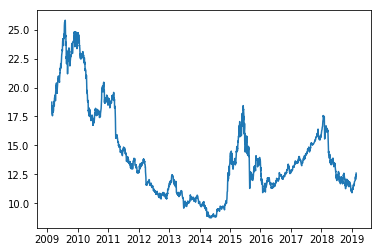

In [68]:
# calc ratio
p_rsum = pd.DataFrame(w.values/p_r.values, columns=p_r.columns, index=p_r.index).sum(axis=1)
p_rsum = pd.DataFrame(1/p_rsum.values, index=p_rsum.index)
plt.plot(p_rsum)

In [52]:
p_rsum.tail()

0
trade_date           
2019-02-18  12.390448
2019-02-19  12.377835
2019-02-20  12.425944
2019-02-21  12.380142
2019-02-22  12.599732

In [75]:
list(p_rsum.columns.values)

[0]

In [73]:
p_rsum.rename(columns={0:'pe'})

pe
trade_date           
2009-02-23  18.741301
2009-02-24  18.135123
2009-02-25  18.176165
2009-02-26  17.808555
2009-02-27  17.742400
2009-03-02  17.740202
2009-03-03  17.562265
2009-03-04  18.281073
2009-03-05  18.441307
2009-03-06  18.250456
2009-03-09  17.858337
2009-03-10  18.099839
2009-03-11  17.939028
2009-03-12  17.906889
2009-03-13  17.906714
2009-03-16  18.039227
2009-03-17  18.384862
2009-03-18  18.375929
2009-03-19  18.426039
2009-03-20  18.541517
2009-03-23  18.745425
2009-03-24  18.825068
2009-03-25  18.432514
2009-03-26  19.001738
2009-03-27  19.050250
2009-03-30  19.159360
2009-03-31  19.227350
2009-04-01  19.156344
2009-04-02  19.271550
2009-04-03  19.290726
...               ...
2019-01-07  11.177152
2019-01-08  11.150178
2019-01-09  11.253034
2019-01-10  11.206634
2019-01-11  11.282093
2019-01-14  11.188630
2019-01-15  11.364831
2019-01-16  11.372217
2019-01-17  11.333220
2019-01-18  11.533759
2019-01-21  11.603496
2019-01-22  11.456722
2019-01-23  11.460111
2019-01-24  11.513775
2019-01-25  11.611994
2019-01-28  11.616336
2019-01-29  11.657264
2019-01-30  11.585206
2019-01-31  11.719586
2019-02-01  11.843903
2019-02-11  11.991110
2019-02-12  12.042669
2019-02-13  12.295164
2019-02-14  12.282694
2019-02-15  12.058738
2019-02-18  12.390448
2019-02-19  12.377835
2019-02-20  12.425944
2019-02-21  12.380142
2019-02-22  12.599732

[2434 rows x 1 columns]

In [57]:
# compare to tushare basic data
time_spread = 10 # Years
t = datetime.date.today()
end_date = t
start_date = datetime.datetime(t.year - time_spread, t.month, t.day)
end_date_str = end_date.strftime("%Y%m%d")
start_date_str = start_date.strftime("%Y%m%d")
r_t = ['trade_date', 'turnover_rate', 'pe', 'pb']
ratio = pro.index_dailybasic(ts_code=index_code, start_date=start_date_str, end_date=end_date_str)
r = ratio[r_t].sort_values(by='trade_date')
r['trade_date'] = pd.to_datetime(r['trade_date'])
r.set_index("trade_date", inplace=True)

In [59]:
r.tail()

turnover_rate     pe    pb
trade_date                            
2019-02-18           0.68  12.41  1.39
2019-02-19           0.66  12.40  1.39
2019-02-20           0.55  12.45  1.40
2019-02-21           0.67  12.40  1.39
2019-02-22           0.69  12.62  1.42